In [7]:
import pandas as pd

df = pd.read_csv('sales_data.csv', encoding='latin1')

df.info() # structure of the dataframe
df.head() # summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [9]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [10]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [12]:
print(df['SALES'].sum())

10032628.85


In [14]:
# monthly total sales

print(df.groupby('MONTH_ID')['SALES'].sum())

MONTH_ID
1      785874.44
2      810441.90
3      754501.39
4      669390.96
5      923972.56
6      454756.78
7      514875.97
8      659310.57
9      584724.27
10    1121215.22
11    2118885.67
12     634679.12
Name: SALES, dtype: float64


In [15]:
print(df.groupby('MONTH_ID')['SALES'].sum()[2])

810441.9


In [16]:
# sales by product code

print(df.groupby('PRODUCTCODE')['SALES'].sum())

PRODUCTCODE
S10_1678      97107.00
S10_1949     191073.03
S10_2016     106017.46
S10_4698     170401.07
S10_4757     113093.73
               ...    
S700_3505     88565.41
S700_3962     80482.72
S700_4002     76175.63
S72_1253      51661.82
S72_3212      61064.10
Name: SALES, Length: 109, dtype: float64


In [17]:
print(df.groupby('PRODUCTLINE')['SALES'].sum())

PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64


In [18]:
print(df.groupby('PRODUCTLINE'))

In [19]:
print(df['PRODUCTLINE'])

0       Motorcycles
1       Motorcycles
2       Motorcycles
3       Motorcycles
4       Motorcycles
           ...     
2818          Ships
2819          Ships
2820          Ships
2821          Ships
2822          Ships
Name: PRODUCTLINE, Length: 2823, dtype: object


In [21]:
print(df[['PRODUCTLINE', 'SALES']])

      PRODUCTLINE    SALES
0     Motorcycles  2871.00
1     Motorcycles  2765.90
2     Motorcycles  3884.34
3     Motorcycles  3746.70
4     Motorcycles  5205.27
...           ...      ...
2818        Ships  2244.40
2819        Ships  3978.51
2820        Ships  5417.57
2821        Ships  2116.16
2822        Ships  3079.44

[2823 rows x 2 columns]


In [23]:
print(df.groupby('PRODUCTLINE').keys)

PRODUCTLINE


In [24]:
print(df.groupby('PRODUCTLINE').groups)

{'Classic Cars': [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, ...], 'Motorcycles': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, ...], 'Planes': [552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562

In [25]:
# product categories

print(df.groupby('PRODUCTLINE').groups.keys())

dict_keys(['Classic Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains', 'Trucks and Buses', 'Vintage Cars'])


In [26]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [27]:
# top 5 selling products

print(df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(5))

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Name: SALES, dtype: float64


In [28]:
# product sales ranking

print(df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False))

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


Text(0.5, 0, 'Date')

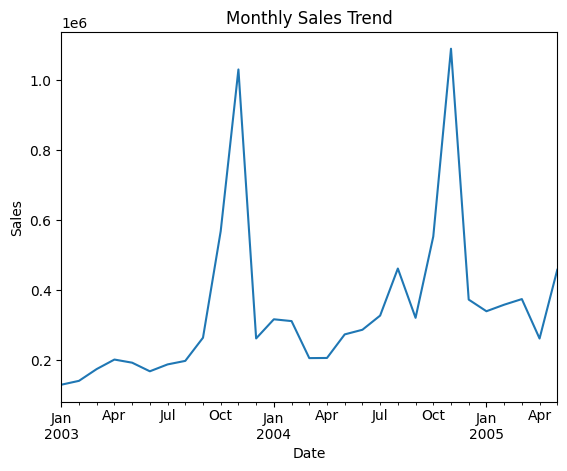

In [54]:
# monthly sales trend

import matplotlib.pyplot as plt
monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')

Text(0.5, 0, 'Product')

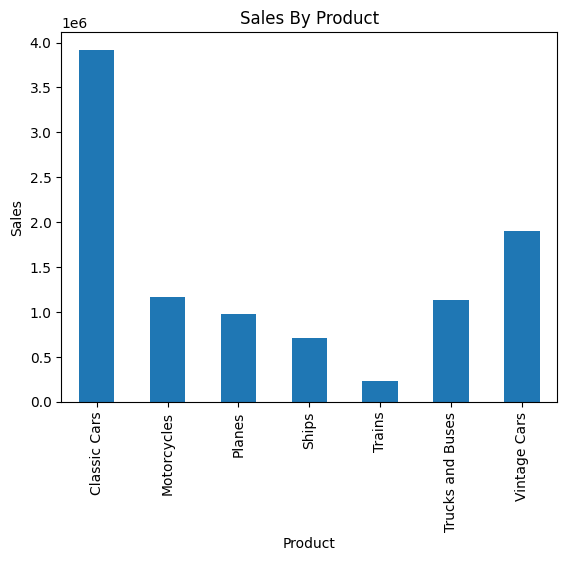

In [62]:
# sales by category

top_products = df.groupby('PRODUCTLINE')['SALES'].sum()
top_products.plot(kind='bar', title='Sales By Product')
plt.ylabel('Sales')
plt.xlabel('Product')

In [59]:
# calculating the average order value (AOV) - average sales per order - total sales divided by number of oders

print(df['SALES'].sum() / df['ORDERNUMBER'].nunique())

32679.57280130293
